In [12]:
import sys
sys.path.append('E://Informer202')

In [13]:
from utils.tools import dotdict
import matplotlib.pyplot as plt
import numpy as np
from exp.exp_informer import Exp_Informer
import os
import torch

In [14]:
# 清空output中文件
import shutil
path = '/kaggle/working/'
if os.path.exists(path):
    try:
        shutil.rmtree(path)
        print('删除完成')
    except:
        print('已清除')

In [15]:
args = dotdict()

args.model = 'informer' # model of experiment, options: [informer, informerstack, informerlight(TBD)]

args.data = 'power' # data
args.root_path = 'E://Informer202//ETDataset-main//ETT-small//' # root path of data file
args.data_path = 'power.csv' # data file
args.features = 'MS' # forecasting task, options:[M, S, MS]; M:multivariate predict multivariate, S:univariate predict univariate, MS:multivariate predict univariate
args.target = '总有功功率' # target feature in S or MS task
args.freq = 't' # freq for time features encoding, options:[s:secondly, t:minutely, h:hourly, d:daily, b:business days, w:weekly, m:monthly], you can also use more detailed freq like 15min or 3h
args.checkpoints = './informer_checkpoints' # location of model checkpoints

args.seq_len = 192 # input sequence length of Informer encoder
args.label_len = 96 # start token length of Informer decoder
args.pred_len = 48 # prediction sequence length
# Informer decoder input: concat[start token series(label_len), zero padding series(pred_len)]

args.enc_in = 7 # encoder input size
args.dec_in = 7 # decoder input size
args.c_out = 7 # output size
args.factor = 5 # probsparse attn factor
args.d_model = 512 # dimension of model
args.n_heads = 8 # num of heads
args.e_layers = 2 # num of encoder layers
args.d_layers = 1 # num of decoder layers
args.d_ff = 2048 # dimension of fcn in model
args.dropout = 0.05 # dropout
args.attn = 'prob' # attention used in encoder, options:[prob, full]
args.embed = 'timeF' # time features encoding, options:[timeF, fixed, learned]
args.activation = 'gelu' # activation
args.distil = True # whether to use distilling in encoder
args.output_attention = False # whether to output attention in ecoder
args.mix = True
args.padding = 0

args.batch_size = 64
args.learning_rate = 0.0001
args.loss = 'mse'
args.lradj = 'type1'
args.use_amp = False # whether to use automatic mixed precision training

args.num_workers = 0
args.itr = 1
args.train_epochs = 20
args.patience = 5
args.des = 'exp'

args.use_gpu = True if torch.cuda.is_available() else False
args.output_attention = True
args.gpu = 0

args.use_multi_gpu = False
args.devices = '0,1,2,3'

In [16]:
args.use_gpu = True if torch.cuda.is_available() and args.use_gpu else False

if args.use_gpu and args.use_multi_gpu:
    args.devices = args.devices.replace(' ','')
    device_ids = args.devices.split(',')
    args.device_ids = [int(id_) for id_ in device_ids]
    args.gpu = args.device_ids[0]

In [17]:
# Set augments by using data name
data_parser = {
    'power':{'data':'power.csv','T':'总有功功率','M':[5,5,5],'S':[1,1,1],'MS':[5,5,1]},
}
if args.data in data_parser.keys():
    data_info = data_parser[args.data]
    args.data_path = data_info['data']
    args.target = data_info['T']
    args.enc_in, args.dec_in, args.c_out = data_info[args.features]

In [18]:
args.detail_freq = args.freq
args.freq = args.freq[-1:]

In [19]:
print('Args in experiment:')
print(args)

Args in experiment:
{'model': 'informer', 'data': 'power', 'root_path': 'E://Informer202//ETDataset-main//ETT-small//', 'data_path': 'power.csv', 'features': 'MS', 'target': '总有功功率', 'freq': 't', 'checkpoints': './informer_checkpoints', 'seq_len': 192, 'label_len': 96, 'pred_len': 48, 'enc_in': 5, 'dec_in': 5, 'c_out': 1, 'factor': 5, 'd_model': 512, 'n_heads': 8, 'e_layers': 2, 'd_layers': 1, 'd_ff': 2048, 'dropout': 0.05, 'attn': 'prob', 'embed': 'timeF', 'activation': 'gelu', 'distil': True, 'output_attention': True, 'mix': True, 'padding': 0, 'batch_size': 64, 'learning_rate': 0.0001, 'loss': 'mse', 'lradj': 'type1', 'use_amp': False, 'num_workers': 0, 'itr': 1, 'train_epochs': 20, 'patience': 5, 'des': 'exp', 'use_gpu': True, 'gpu': 0, 'use_multi_gpu': False, 'devices': '0,1,2,3', 'detail_freq': 't'}


In [20]:
Exp = Exp_Informer

for ii in range(args.itr):
    # setting record of experiments
    setting = '{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_at{}_fc{}_eb{}_dt{}_mx{}_{}_{}'.format(args.model, args.data, args.features,
                args.seq_len, args.label_len, args.pred_len,
                args.d_model, args.n_heads, args.e_layers, args.d_layers, args.d_ff, args.attn, args.factor, args.embed, args.distil, args.mix, args.des, ii)

    # set experiments
    exp = Exp(args)

    # train
    exp.train(setting)

    # test
    exp.test(setting)

    torch.cuda.empty_cache()

Use GPU: cuda:0
train 90077
val 12857
test 25757
	iters: 100, epoch: 1 | loss: 0.2931330
	speed: 0.2730s/iter; left time: 7654.3758s
	iters: 200, epoch: 1 | loss: 0.1602263
	speed: 0.2281s/iter; left time: 6374.2961s
	iters: 300, epoch: 1 | loss: 0.0699802
	speed: 0.2282s/iter; left time: 6352.7107s
	iters: 400, epoch: 1 | loss: 0.1546798
	speed: 0.2283s/iter; left time: 6334.3595s
	iters: 500, epoch: 1 | loss: 0.0738052
	speed: 0.2279s/iter; left time: 6299.1522s
	iters: 600, epoch: 1 | loss: 0.0555890
	speed: 0.2278s/iter; left time: 6274.1082s
	iters: 700, epoch: 1 | loss: 0.0936680
	speed: 0.2273s/iter; left time: 6237.9308s
	iters: 800, epoch: 1 | loss: 0.1529845
	speed: 0.2282s/iter; left time: 6238.1983s
	iters: 900, epoch: 1 | loss: 0.0555400
	speed: 0.2283s/iter; left time: 6218.9797s
	iters: 1000, epoch: 1 | loss: 0.0745301
	speed: 0.2149s/iter; left time: 5833.5395s
	iters: 1100, epoch: 1 | loss: 0.0523246
	speed: 0.2111s/iter; left time: 5707.5797s
	iters: 1200, epoch: 1 | 

In [32]:
for i in os.listdir('E://Informer202//informer_checkpoints'):
    setting = i

In [33]:
import os

# set saved model path    设置保存的模型路径
setting = 'informer_power_ftMS_sl192_ll96_pl48_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0'
# path = os.path.join(args.checkpoints,setting,'checkpoint.pth')

In [35]:
# 生成预测值
exp.predict(setting, True)
# 文件路径
pred = np.load('E://Informer202//results//'+setting+'/pred.npy')
true = np.load('E://Informer202//results//'+setting+'/true.npy')
prediction = np.load('E://Informer202//results//'+setting+'/real_prediction.npy')
pred.shape,true.shape

pred 1


((25728, 48, 1), (25728, 48, 1))

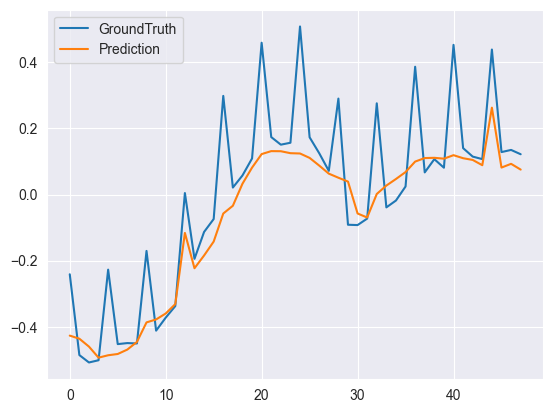

In [36]:
# 模型效果对比图
plt.figure()
plt.plot(true[0,:,-1], label='GroundTruth')
plt.plot(pred[0,:,-1], label='Prediction')
plt.legend()
plt.show()

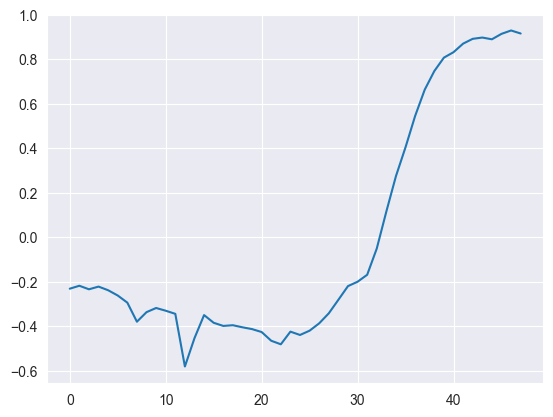

In [37]:
# 预测序列图
plt.figure()
plt.plot(prediction[0,:,-1])
plt.show()